# loading the necessary libraries and importing data set 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_20newsgroups


# Loading the dataset

In [5]:
data = fetch_20newsgroups()
data.data[9]

"From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubject: Re: Sigma Designs Double up??\nArticle-I.D.: ux1.C52u8x.B62\nOrganization: University of Illinois at Urbana\nLines: 29\n\njap10@po.CWRU.Edu (Joseph A. Pellettiere) writes:\n\n\n>\tI am looking for any information about the Sigma Designs\n>\tdouble up board.  All I can figure out is that it is a\n>\thardware compression board that works with AutoDoubler, but\n>\tI am not sure about this.  Also how much would one cost?\n\nI've had the board for over a year, and it does work with Diskdoubler,\nbut not with Autodoubler, due to a licensing problem with Stac Technologies,\nthe owners of the board's compression technology. (I'm writing this\nfrom memory; I've lost the reference. Please correct me if I'm wrong.)\n\nUsing the board, I've had problems with file icons being lost, but it's\nhard to say whether it's the board's fault or something else; however,\nif I decompress the troubled file and recompress it without the board,\nthe icon usuall

In [6]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [7]:
data['DESCR']

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total           

In [8]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)
print((train.data[5]))

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [18]:
def predict_category(s, train = train, model =model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [19]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [20]:
predict_category('Sending load to International Space Station')

'sci.space'

In [21]:
predict_category('ISRO is going to send 2 more rocket in the next 2years')

'sci.space'

In [24]:
predict_category('I like lambhorgini')

'rec.motorcycles'

In [25]:
predict_category('MLA in india has been arrested')

'talk.politics.guns'

In [33]:
predict_category('my name is sasidhar')

'soc.religion.christian'

# naive Bayes

In [35]:
X_train = train.data
y_train = train.target
X_test = test.data
y_test = test.target

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [39]:
def predict_category(s, train = train, model =model): 
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [44]:
print(accuracy_score(test.target, labels))

0.7738980350504514


In [45]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [46]:
predict_category('Sending load to International Space Station')

'sci.space'

In [47]:
predict_category('ISRO is going to send 2 more rocket in the next 2years')

'sci.space'

In [48]:
predict_category('I like lambhorgini')

'rec.motorcycles'

In [49]:
predict_category('MLA in india has been arrested')

'talk.politics.guns'

In [50]:
print(classification_report(test.target, labels))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

# K Nearest Neighbors(KNN)

In [85]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [112]:
y_pred_knn = knn.predict(X_test)

/Users/sasidhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [87]:
print(accuracy_score(y_test, y_pred_knn))

0.6578597981943707


In [88]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.75      0.54       319
           1       0.45      0.65      0.53       389
           2       0.52      0.56      0.54       394
           3       0.52      0.62      0.57       392
           4       0.55      0.58      0.56       385
           5       0.69      0.59      0.64       395
           6       0.59      0.48      0.53       390
           7       0.75      0.68      0.71       396
           8       0.83      0.80      0.82       398
           9       0.77      0.75      0.76       397
          10       0.88      0.82      0.85       399
          11       0.74      0.83      0.78       396
          12       0.72      0.47      0.57       393
          13       0.78      0.51      0.62       396
          14       0.81      0.77      0.79       394
          15       0.80      0.72      0.76       398
          16       0.72      0.72      0.72       364
          17       0.70    

In [89]:
print(test.target)
print(y_pred_knn)

[ 7  5  0 ...  9  6 15]
[12  4  0 ...  2 19 15]


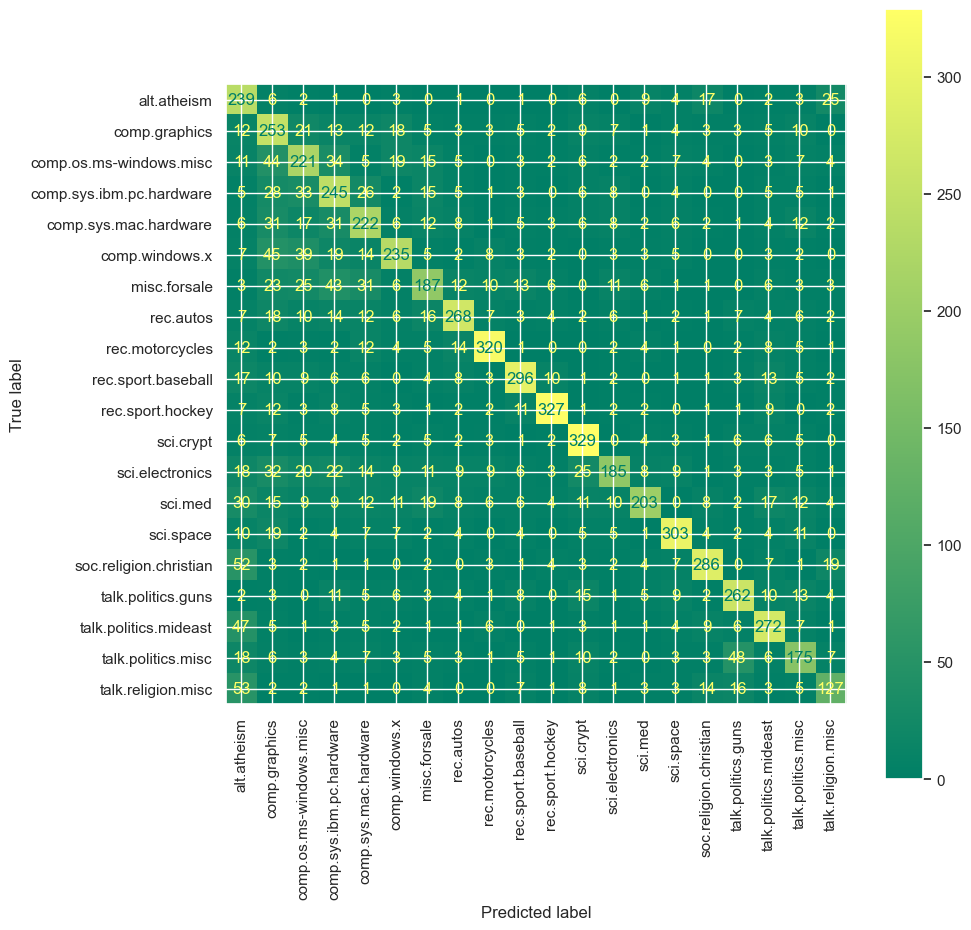

In [92]:
con_matrix = confusion_matrix(test.target, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels =categories)
fig, ax = plt.subplots(figsize = (10, 10))
disp = disp.plot(xticks_rotation = 'vertical', ax = ax, cmap = 'summer')
plt.show()

## Logistic Reggression 

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_pred_lr = lr.predict(X_test)

In [95]:
print(accuracy_score(y_test, y_pred_lr))

0.8274030801911842


In [96]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       319
           1       0.69      0.79      0.74       389
           2       0.75      0.73      0.74       394
           3       0.72      0.72      0.72       392
           4       0.81      0.83      0.82       385
           5       0.83      0.74      0.78       395
           6       0.76      0.90      0.82       390
           7       0.90      0.89      0.90       396
           8       0.95      0.95      0.95       398
           9       0.88      0.92      0.90       397
          10       0.94      0.95      0.95       399
          11       0.94      0.88      0.91       396
          12       0.76      0.80      0.78       393
          13       0.89      0.83      0.85       396
          14       0.91      0.92      0.91       394
          15       0.81      0.94      0.87       398
          16       0.72      0.88      0.79       364
          17       0.96    

In [97]:
print(test.target)
print(y_pred_lr)

[ 7  5  0 ...  9  6 15]
[ 7  1  0 ...  9 12 15]


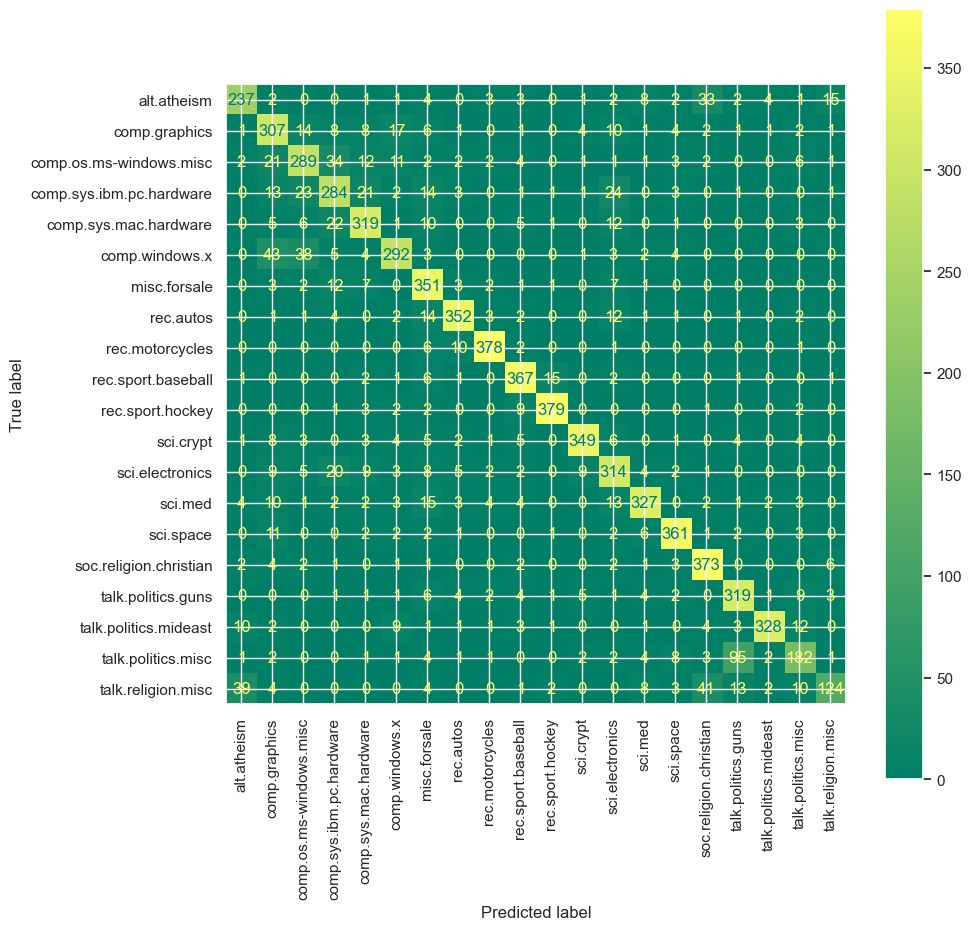

In [102]:
con_matrix = confusion_matrix(test.target, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels =categories)
fig, ax = plt.subplots(figsize = (10, 10))
disp = disp.plot(xticks_rotation = 'vertical', ax = ax, cmap = 'summer') 
plt.show()

# Support vector machine 

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tf = TfidfVectorizer()
X_train = tf.fit_transform(train.data)
X_test = tf.transform(test.data)
X_train.shape, X_test.shape

((11314, 130107), (7532, 130107))

In [104]:
from sklearn.svm import SVC

In [105]:
svc = SVC()

In [106]:
svc.fit(X_train, train.target)

SVC()

In [107]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([12,  1,  0, ...,  9, 12, 15])

In [108]:
print(accuracy_score(test.target, y_pred_svc))

0.8186404673393521


In [109]:
print(classification_report(test.target, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       319
           1       0.62      0.82      0.71       389
           2       0.80      0.70      0.75       394
           3       0.73      0.78      0.76       392
           4       0.82      0.83      0.82       385
           5       0.83      0.73      0.77       395
           6       0.73      0.91      0.81       390
           7       0.90      0.87      0.89       396
           8       0.96      0.93      0.95       398
           9       0.88      0.91      0.90       397
          10       0.97      0.91      0.94       399
          11       0.96      0.85      0.90       396
          12       0.65      0.85      0.74       393
          13       0.88      0.78      0.82       396
          14       0.93      0.88      0.90       394
          15       0.79      0.92      0.85       398
          16       0.75      0.88      0.81       364
          17       0.97    

In [110]:
print(test.target)
print(y_pred_svc)

[ 7  5  0 ...  9  6 15]
[12  1  0 ...  9 12 15]


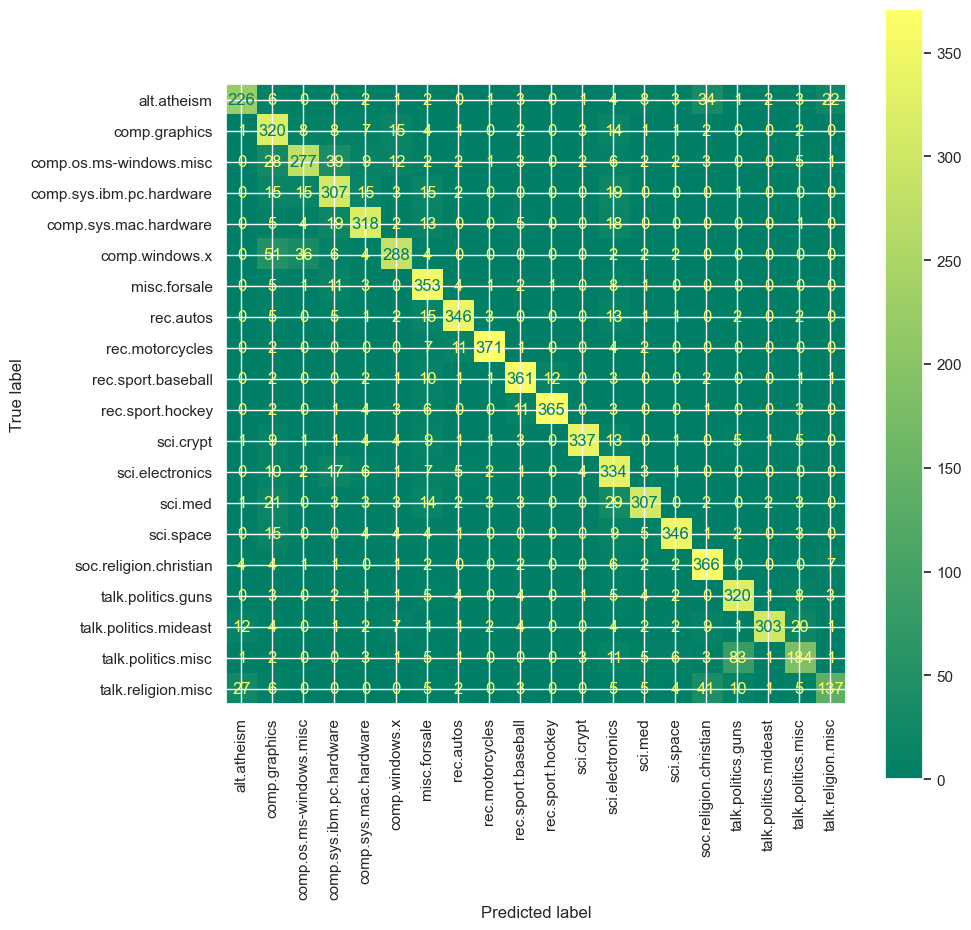

In [111]:
con_matrix = confusion_matrix(test.target, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels =categories)
fig, ax = plt.subplots(figsize = (10, 10))
disp = disp.plot(xticks_rotation = 'vertical', ax = ax, cmap = 'summer') 
plt.show()